In [1]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
from scipy.interpolate import interpn

#from mpl_toolkits.basemap import Basemap
import math
import warnings
%matplotlib inline
import xarray as xr
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', message='All-NaN slice encountered')

from matplotlib import cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
# %load latlon_functions.py

In [2]:
ds = xr.open_dataset('/scratch/project_2000789/muramarg/run_5_27/output_WAOM_check/ocean_flt.nc')
dg = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10_frc/waom10extend_grd.nc')

In [ ]:
# #DO NOT RUN UNLESS POINTS.TXT HAS NOT BEEN CREATED LOCALLY
# x = (ds.variables['Xgrid'].values)
# y = (ds.variables['Ygrid'].values)
# long,lat = grid_to_spherical(x,y,dg)

In [ ]:
# #DO NOT RUN UNLESS POINTS.TXT HAS NOT BEEN CREATED LOCALLY
# # save long and lat to a text file so we don't have to do this again
# # write the above to a text file
# lines = []
# for i in (long):
#     line = ""
#     for x in i:
#         mystr = str(x)
#         line += mystr
#         line += ","
#     # create the line to add to lines
#     lines.append(line)
# with open('lonpoints.txt', 'w') as f:
#     for line in lines:
#         f.write(line)
#         f.write('\n')
# f.close()

# lines=[]
# for i in (lat):
#     line = ""
#     for x in i:
#         mystr = str(x)
#         line += mystr
#         line += ","
#     # create the line to add to lines
#     lines.append(line)
# with open('latpoints.txt', 'w') as f:
#     for line in lines:
#         f.write(line)
#         f.write('\n')
# f.close()

In [3]:
# load the latitude and longitude points from a text file
f = open('lonpoints.txt', 'r')
j = open('latpoints.txt','r')
lineslong = np.genfromtxt("lonpoints.txt", delimiter=",", dtype=np.float32, filling_values=None)
lineslat = np.genfromtxt("latpoints.txt", delimiter=",", dtype=np.float32, filling_values=None)
# lines = np.array(lines)
#print(lines.shape)
f.close()
j.close()
print(lineslat.shape)

(35041, 106)


In [4]:
ds1 = xr.open_dataset('/scratch/project_2000789/muramarg/run_5_27/output_WAOM_check/ocean_avg_0001.nc')
ds1 = ds.chunk({'ocean_time': 1})

# plotting as grid coordinates
x = (ds.variables['Xgrid'].values)
y = (ds.variables['Ygrid'].values)
#fig = plt.figure(figsize=(17,12))
#ds1.salt.isel(ocean_time=1).plot()
#plt.plot(x,y,marker = '.',markersize=2, color='g')
#plt.show()

In [5]:
#ds1 = ds1.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])
from matplotlib import cm
ds1 = xr.open_dataset('/scratch/project_2000789/muramarg/run_5_27/output_WAOM_check/ocean_avg_0001.nc')
ds1 = ds1.chunk({'ocean_time': 1})
ds = xr.open_dataset('/scratch/project_2000789/muramarg/run_5_27/output_WAOM_check/ocean_flt.nc')
dg = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10_frc/waom10extend_grd.nc')

ds1.coords["lon_rho"] = dg.lon_rho
ds1.coords["lat_rho"] = dg.lat_rho

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100


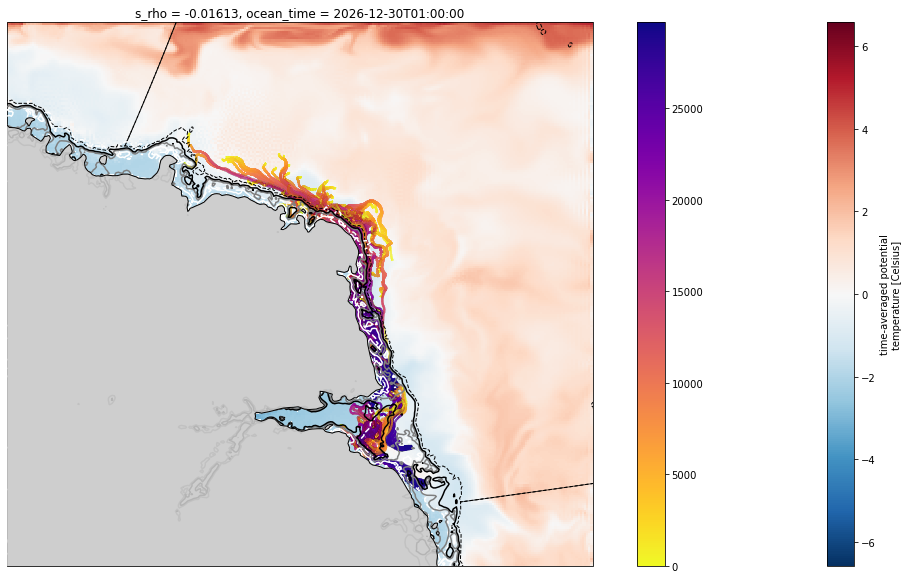

In [8]:
proj = ccrs.SouthPolarStereo(central_longitude=0.0, true_scale_latitude=None, globe=None)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection=proj) 
#ds1.temp.isel(ocean_time=1).plot(transform=ccrs.PlateCarree())
#ax.coastlines(facecolor='white',edgecolor='black')
ax.coastlines(zorder=7,facecolor='white',edgecolor='black')
#plt.pcolormesh(dg.lon_rho[300:560,200:630],dg.lat_rho[300:560,200:630],ds1.temp.isel(xi_rho=slice(200, 630),eta_rho=slice(300,560)),transform=ccrs.PlateCarree())


xlimit = np.arange(300,560,1)
ylimit = np.arange(350,630,1)

#myds = ds1.temp[xlimit,ylimit]
ds1.temp.isel(s_rho=-1, ocean_time=0,xi_rho=slice(350, 630),eta_rho=slice(300,630)).plot(x="lon_rho", y="lat_rho",transform=ccrs.PlateCarree())
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.zice[xlimit,ylimit],levels=[-0.2],zorder=5,linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.h[xlimit,ylimit],levels=[200,400,600],zorder=5, linestyles='solid', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
#ax.add_feature(bathym, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
#ax.add_feature(cfeature.LAND,facecolor='#c9c9c9',alpha=0.9)
ax.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
ax.add_feature(cfeature.LAND,facecolor='#c9c9c9',zorder=6,alpha=0.9)
#plt.scatter(lineslong,lineslat,marker = '.', linewidths=0.02,color='g',alpha=0.1,transform=ccrs.PlateCarree())

x = (ds.variables['Xgrid'].values)
y = (ds.variables['Ygrid'].values)
norm = plt.Normalize(0,29700)
for i in range(0,104):
    if i%5==0:
        print(i)
    firstlong = np.array([(row[i]) for s,row in enumerate(lineslong) if not math.isnan(row[i])])
    firstlat = np.array([(row[i]) for s,row in enumerate(lineslat) if not math.isnan(row[i])])
    myrange = np.arange(0,len(firstlong),1,dtype=int)

    # create the segments of [lat,long]
    points = np.array([firstlong, firstlat]).T.reshape(-1,1,2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap='plasma_r', norm=norm)
    lc.set(transform=ccrs.PlateCarree())
    lc.set_array(myrange)
    lc.set_linewidth(2)
    line = ax.add_collection(lc)
    #ax.add_line(lc)
fig.colorbar(line, ax=ax)


plt.savefig("point_contours.png")
plt.show()

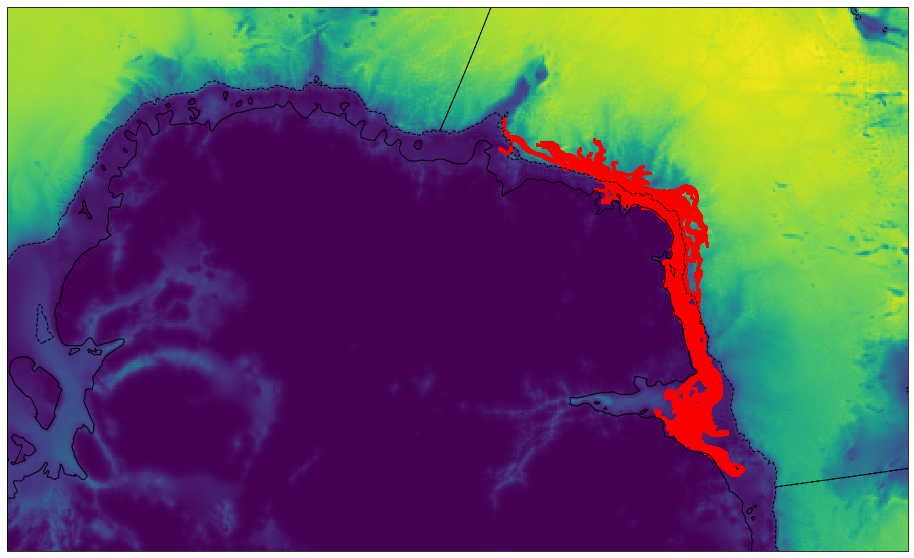

In [36]:
# a faster way to display the floats in a file
proj = ccrs.SouthPolarStereo(central_longitude=0.0, true_scale_latitude=None, globe=None)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection=proj) 
#ds1.temp.isel(ocean_time=1).plot(transform=ccrs.PlateCarree())
ax.coastlines()
plt.pcolormesh(dg.lon_rho[300:560,200:630],dg.lat_rho[300:560,200:630],ds1.h.isel(xi_rho=slice(200, 630),eta_rho=slice(300,560)),transform=ccrs.PlateCarree())


bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')


ax.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
#plt.plot(lineslong,lineslat,marker = '.',markersize=1, color='r',transform=ccrs.PlateCarree())
plt.scatter(lineslong,lineslat,marker = '.',linewidths=0.02, color='r',alpha=0.3,transform=ccrs.PlateCarree())

plt.show()

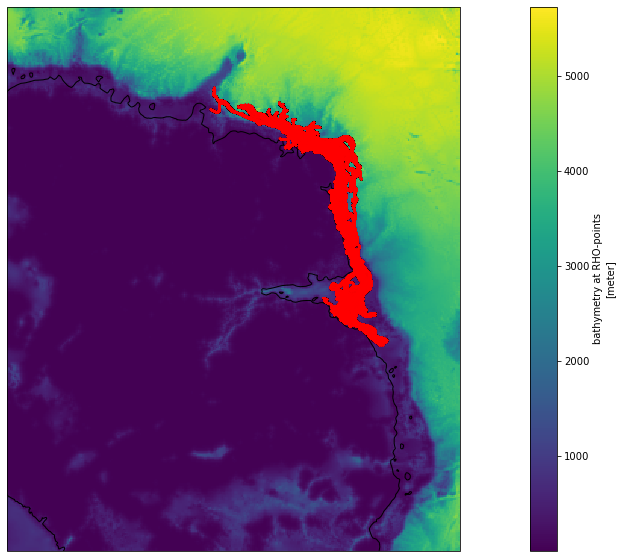

In [11]:
#map_proj = ccrs.SouthPolarStereo(central_longitude=0.0, true_scale_latitude=None, globe=None)
#sh = 

proj = ccrs.SouthPolarStereo(central_longitude=0.0, true_scale_latitude=None, globe=None)
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1, 1, 1, projection=proj) 
#ax.set_extent([40, 100, -68,-65], ccrs.PlateCarree())
plt.axes(projection=proj)
ax.coastlines()
ax = ds1.h.isel(xi_rho=slice(300, 600),eta_rho=slice(200,600)).plot(x="lon_rho", y="lat_rho",transform=ccrs.PlateCarree())



# #plt.pcolormesh(dg.lon_rho,dg.lat_rho,ds1.temp.isel(ocean_time=1),transform=ccrs.PlateCarree())
plt.plot(lineslong,lineslat,marker = '.',markersize=1, color='r',transform=ccrs.PlateCarree())
# ax.set_xlim(30, 80)
# ax.set_ylim(-70,-60)
plt.show()

In [17]:
#ds1 = ds1.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])
from matplotlib import cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

ds1 = xr.open_dataset('/scratch/project_2000789/muramarg/run_5_27/output_WAOM_check/ocean_avg_0001.nc')
ds1 = ds.chunk({'ocean_time': 1})
ds = xr.open_dataset('/scratch/project_2000789/muramarg/run_5_27/output_WAOM_check/ocean_flt.nc')
dg = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10_frc/waom10extend_grd.nc')

ds1.coords["lon_rho"] = dg.lon_rho
ds1.coords["lat_rho"] = dg.lat_rho


In [ ]:
# show the float locations only without a map
firstlong = np.array([(row[50]) for s,row in enumerate(x) if not math.isnan(row[50])])
firstlat = np.array([(row[50]) for s,row in enumerate(y) if not math.isnan(row[50])])
myrange = np.arange(0,len(firstlong),1,dtype=int)

# create the segments of [lat,long]
points = np.array([firstlong, firstlat]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(myrange.min(),myrange.max())

# Plot
fig, ax = plt.subplots(1,1, figsize=(10,10))

lc = LineCollection(segments, cmap='coolwarm', norm=norm)
lc.set_array(myrange)
lc.set_linewidth(2)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)

#plt.pcolormesh(dg.lon_rho,dg.lat_rho,ds1.temp.isel(ocean_time=1),transform=ccrs.PlateCarree())
#plt.plot(long,lat,marker = '.',markersize=1, color='b',transform=ccrs.PlateCarree())
ax.set_xlim(firstlong.min(), firstlong.max())
ax.set_ylim(firstlat.min(), firstlat.max())
plt.show()

0


TypeError: add_collection() got an unexpected keyword argument 'zorder'

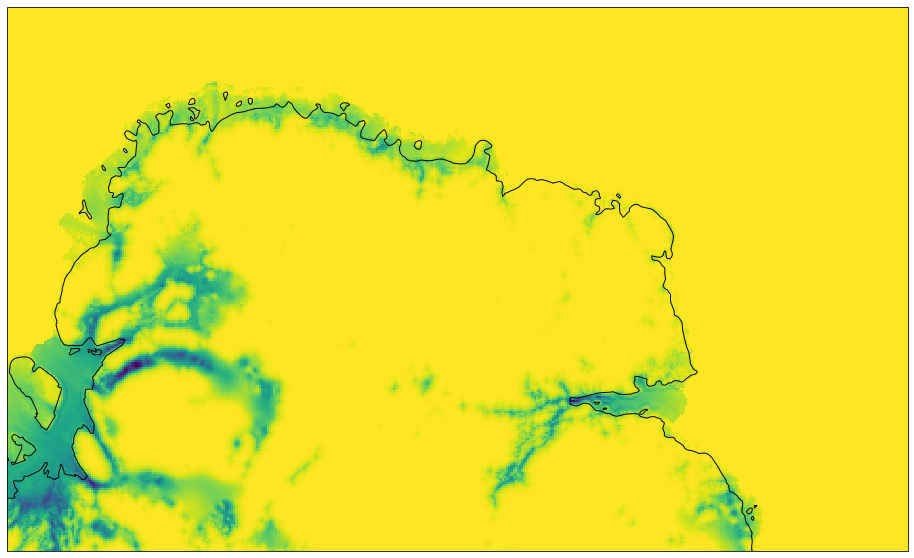

In [27]:
# proj = ccrs.SouthPolarStereo(central_longitude=0.0, true_scale_latitude=None, globe=None)
# fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(1, 1, 1, projection=proj) 
# #ds1.temp.isel(ocean_time=1).plot(transform=ccrs.PlateCarree())
# ax.coastlines()
# plt.pcolormesh(dg.lon_rho[300:560,200:630],dg.lat_rho[300:560,200:630],ds1.zice.isel(xi_rho=slice(200, 630),eta_rho=slice(300,560)),transform=ccrs.PlateCarree())
# #plt.plot(lineslong,lineslat,marker = '.',markersize=1, color='r',transform=ccrs.PlateCarree())

# x = (ds.variables['Xgrid'].values)
# y = (ds.variables['Ygrid'].values)
# norm = plt.Normalize(0,29700)
# for i in range(0,10):
#     print(i)
#     firstlong = np.array([(row[i]) for s,row in enumerate(lineslong) if not math.isnan(row[i])])
#     firstlat = np.array([(row[i]) for s,row in enumerate(lineslat) if not math.isnan(row[i])])
#     myrange = np.arange(0,len(firstlong),1,dtype=int)

#     # create the segments of [lat,long]
#     points = np.array([firstlong, firstlat]).T.reshape(-1,1,2)
#     segments = np.concatenate([points[:-1], points[1:]], axis=1)

#     lc = LineCollection(segments, cmap='coolwarm', norm=norm)
#     lc.set(transform=ccrs.PlateCarree())
#     lc.set_array(myrange)
#     lc.set_linewidth(2)
#     line = ax.add_collection(lc)
#     #ax.add_line(lc)
# fig.colorbar(line, ax=ax)

# #plt.pcolormesh(dg.lon_rho,dg.lat_rho,ds1.temp.isel(ocean_time=1),transform=ccrs.PlateCarree())
# #plt.plot(long,lat,marker = '.',markersize=1, color='b',transform=ccrs.PlateCarree())
# #ax.set_xlim(420, 550)
# #ax.set_ylim(325,525)
# plt.show()